 Feature Engineering & Data Wrangling - PROJECT TITANIC

In [189]:
'''
Thực hành phân tích dữ liệu trên tập Titanic: #6,7
    1.) Ai là hành khác trên tàu Titanic? (Age, Gender, Class, .. etc.)?
    2.) Mối quan hệ giữa tầng lớp và vị trí ngồi trên tàu?
    3.) Những hành khách đến từ đâu (Cherbourg, Queenstown, Southhampton)?
    4.) Ai đi một mình, ai đi với gia đình?
    5.) Đưa ra nhận xét về yếu tố giúp một người sống sót.

Quy trình phân tích trên tập dữ liệu: Những câu hỏi cần đặt ra khi phân tích
    1.) Khảo sát phân phối hết các cột và mối liên hệ của các cột
    2.) Tập trung vào target để khai thác các yếu tố liên quan (sống vs chết)
    3.) Tỉ lệ sống theo: 
        - giới tính
        - trẻ con hay người lớn
        - theo class
        - đi 1 mình hay với gia đình
        - số anh chị em
        - vị trí chỗ ngồi
        - đến từ đâu, ...
    4.) Đưa ra kết luận về phân phối của toàn bộ dữ liệu
        4.1) Phụ nữ sống nhiều hơn 
        4.2) Trẻ em sống nhiều hơn 
        4.3) class 1 sống nhiều hơn 
        4.4) vị trí chổ ngồi 
        4.5) đến từ đâu 
        4.6) độ tuổi
    
Mô tả dữ liệu:
    Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    survival Survival (0 = No; 1 = Yes)
    name Name
    sex Sex
    age Age
    sibsp Number of Siblings/Spouses Aboard
    parch Number of Parents/Children Aboard
    ticket Ticket Number
    fare Passenger Fare (British pound)
    cabin Cabin
    embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
'''

'\nThực hành phân tích dữ liệu trên tập Titanic: #6,7\n    1.) Ai là hành khác trên tàu Titanic? (Age, Gender, Class, .. etc.)?\n    2.) Mối quan hệ giữa tầng lớp và vị trí ngồi trên tàu?\n    3.) Những hành khách đến từ đâu (Cherbourg, Queenstown, Southhampton)?\n    4.) Ai đi một mình, ai đi với gia đình?\n    5.) Đưa ra nhận xét về yếu tố giúp một người sống sót.\n\nQuy trình phân tích trên tập dữ liệu: Những câu hỏi cần đặt ra khi phân tích\n    1.) Khảo sát phân phối hết các cột và mối liên hệ của các cột\n    2.) Tập trung vào target để khai thác các yếu tố liên quan (sống vs chết)\n    3.) Tỉ lệ sống theo: \n        - giới tính\n        - trẻ con hay người lớn\n        - theo class\n        - đi 1 mình hay với gia đình\n        - số anh chị em\n        - vị trí chỗ ngồi\n        - đến từ đâu, ...\n    4.) Đưa ra kết luận về phân phối của toàn bộ dữ liệu\n        4.1) Phụ nữ sống nhiều hơn \n        4.2) Trẻ em sống nhiều hơn \n        4.3) class 1 sống nhiều hơn \n        4.4) v

In [190]:
'''
PassengerClass: là hạng hành khách (có 3 hạng nhất =1, hạng nhì =2, hạng 3 =3)
SurvivedIndicator: là mã số đánh dấu tình trạng hành khách Sống sót =1 hay không sống sót =2
Name: là Tên của từng hành khách
Sex: là giới tính của từng hành khách (female = khách nữ, male = khách nam)
Age: là tuối của từng hành khách
Siblings: là Số anh / chị / em / vợ / chồng cùng trên tàu (họ hàng)
Parents: là Số lượng cha mẹ / trẻ em trên tàu (gia đình)
Ticket: là Số vé
Fare: là Giá vé
Cabin: là Toa tàu
Embarked: là lên tầu từ cảng (C = Cherbourg; Q = Queenstown; S = Southampton)
Boat: là Thuyền cứu sinh (nếu sống sót)
Body: là Mã số thi thể (nếu không sống sót và thi thể được tìm thấy)
'''

'\nPassengerClass: là hạng hành khách (có 3 hạng nhất =1, hạng nhì =2, hạng 3 =3)\nSurvivedIndicator: là mã số đánh dấu tình trạng hành khách Sống sót =1 hay không sống sót =2\nName: là Tên của từng hành khách\nSex: là giới tính của từng hành khách (female = khách nữ, male = khách nam)\nAge: là tuối của từng hành khách\nSiblings: là Số anh / chị / em / vợ / chồng cùng trên tàu (họ hàng)\nParents: là Số lượng cha mẹ / trẻ em trên tàu (gia đình)\nTicket: là Số vé\nFare: là Giá vé\nCabin: là Toa tàu\nEmbarked: là lên tầu từ cảng (C = Cherbourg; Q = Queenstown; S = Southampton)\nBoat: là Thuyền cứu sinh (nếu sống sót)\nBody: là Mã số thi thể (nếu không sống sót và thi thể được tìm thấy)\n'

In [191]:
#IMPORT LIB

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [192]:
#LOAD DATA

train_df = pd.read_csv ("titanic_train.csv")
test_df = pd.read_csv ("titanic_test.csv")

In [193]:
train_df.columns

Index(['PassengerId', 'Sex', 'Age', 'Name', 'Survived', 'Pclass', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [194]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [195]:
#REVIEW DATA
train_df.head ()

,PassengerId,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,male,22.0,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,NaN,S
1,2,female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,53.1000,C123,S
4,5,male,35.0,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,NaN,S


In [196]:
train_df.set_index(train_df.PassengerId, inplace = True)

In [197]:
train_df.head()

,PassengerId,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,male,22.0,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,NaN,S
2,2,female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,71.2833,C85,C
3,3,female,26.0,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,53.1000,C123,S
5,5,male,35.0,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,NaN,S


In [198]:
train_df.drop('PassengerId', axis=1, inplace=True)

In [199]:
train_df

,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,male,22.0,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,NaN,S
2,female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,71.2833,C85,C
3,female,26.0,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,S
4,female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,53.1000,C123,S
5,male,35.0,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,male,27.0,"Montvila, Rev. Juozas",0,2,0,0,211536,13.0000,NaN,S
888,female,19.0,"Graham, Miss. Margaret Edith",1,1,0,0,112053,30.0000,B42,S
889,female,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",0,3,1,2,W./C. 6607,23.4500,NaN,S


In [200]:
train_df.head()

,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,male,22.0,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,NaN,S
2,female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,71.2833,C85,C
3,female,26.0,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,S
4,female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,53.1000,C123,S
5,male,35.0,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,NaN,S


   1.1 Feature Classification: Categorical vs Numerical

In [201]:
'''
this helps us select the appropriate plots for visualization

which feature are categorical?
    categorical features: nominal, ordinal, ratio, interval
    to classify the samples into sets of similar samples

which features are numerical?
    numerical feature: discrete,m continous, or timeseries
    these values change from samples
'''

'\nthis helps us select the appropriate plots for visualization\n\nwhich feature are categorical?\n    categorical features: nominal, ordinal, ratio, interval\n    to classify the samples into sets of similar samples\n\nwhich features are numerical?\n    numerical feature: discrete,m continous, or timeseries\n    these values change from samples\n'

2. LOADING THE DATA

In [202]:
test_df = pd.read_csv ('titanic_test.csv', index_col="PassengerId")

In [203]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [204]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       714 non-null    float64
 2   Name      891 non-null    object 
 3   Survived  891 non-null    int64  
 4   Pclass    891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [205]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [206]:
'''
Categorical: Survived, Sex,  Embarked, Pclass (ordinal), SibSp, Parch
Numerical: (continuous) age, Fare, (discrete)
Mix types of data: ticket, cabin
Contain Error/Typo: Name
Blank or null: Cabin > age > Embarked
Various Data Type: String, Int, Float
'''

'\nCategorical: Survived, Sex,  Embarked, Pclass (ordinal), SibSp, Parch\nNumerical: (continuous) age, Fare, (discrete)\nMix types of data: ticket, cabin\nContain Error/Typo: Name\nBlank or null: Cabin > age > Embarked\nVarious Data Type: String, Int, Float\n'

In [207]:
train_df["Survived"] = train_df ["Survived"].astype("category")

In [208]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [209]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Sex       891 non-null    object  
 1   Age       714 non-null    float64 
 2   Name      891 non-null    object  
 3   Survived  891 non-null    category
 4   Pclass    891 non-null    int64   
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [210]:
features = ["Pclass", "Sex", "SibSp","Parch", "Embarked"]
def convert_cat (df, features):
    for feature in features:
        df[feature] = df[feature].astype("category") 
#df.Pclass, df."Pclass" => df ["Pclass"]
convert_cat(train_df, features)
convert_cat(test_df, features)

In [211]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Sex       891 non-null    category
 1   Age       714 non-null    float64 
 2   Name      891 non-null    object  
 3   Survived  891 non-null    category
 4   Pclass    891 non-null    category
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex  

In [212]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [213]:
train_df.describe(include=['O'])

,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Braund, Mr. Owen Harris",347082,B96 B98
freq,1,7,4


1.2 Distribution of Categorical features

In [214]:
train_df.describe(include=['category'])

,Sex,Survived,Pclass,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,2,3,7,7,3
top,male,0,3,0,0,S
freq,577,549,491,608,678,644


In [215]:
'''
PassengerClass: là hạng hành khách (có 3 hạng nhất =1, hạng nhì =2, hạng 3 =3)
SurvivedIndicator: là mã số đánh dấu tình trạng hành khách Sống sót =1 hay không sống sót =2
Name: là Tên của từng hành khách
Sex: là giới tính của từng hành khách (female = khách nữ, male = khách nam)
Age: là tuối của từng hành khách
Siblings: là Số anh / chị / em / vợ / chồng cùng trên tàu (họ hàng)
Parents: là Số lượng cha mẹ / trẻ em trên tàu (gia đình)
Ticket: là Số vé
Fare: là Giá vé
Cabin: là Toa tàu
Embarked: là lên tầu từ cảng (C = Cherbourg; Q = Queenstown; S = Southampton)
Boat: là Thuyền cứu sinh (nếu sống sót)
Body: là Mã số thi thể (nếu không sống sót và thi thể được tìm thấy)
'''

'''
DỰA VÀO train_df.describe trên:
- Tổng số hành khách trong tệp khảo sát train_df là: 891, lên tàu từ cảng nào đếm được 889
- Những số liệu có duy nhất, Số liệu chiếm tỷ lệ nhiều nhất, và tần số
'''


'\nDỰA VÀO train_df.describe trên:\n- Tổng số hành khách trong tệp khảo sát train_df là: 891, lên tàu từ cảng nào đếm được 889\n- Những số liệu có duy nhất, Số liệu chiếm tỷ lệ nhiều nhất, và tần số\n'

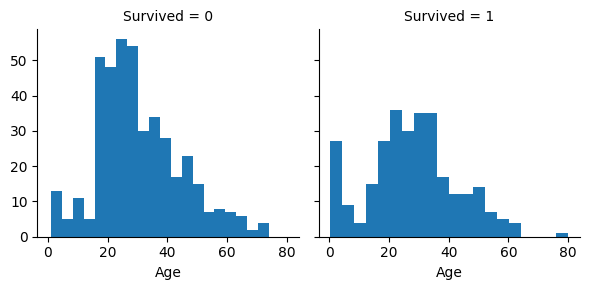

In [216]:
#Tỷ lệ sống theo độ tuổi
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

3. EXPLORATORY DATA ANALYSIS (EDA)

3.1 Correlating categorical feature: categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch

Taget Varible: Survived, Sex, embarked, Pclass (ordinal), SibSp, Parch

In [217]:
#Đếm số người sống và người chết
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [218]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


SEX

In [219]:
#Đếm số người nam và nữ trên tàu
train_df['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [220]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


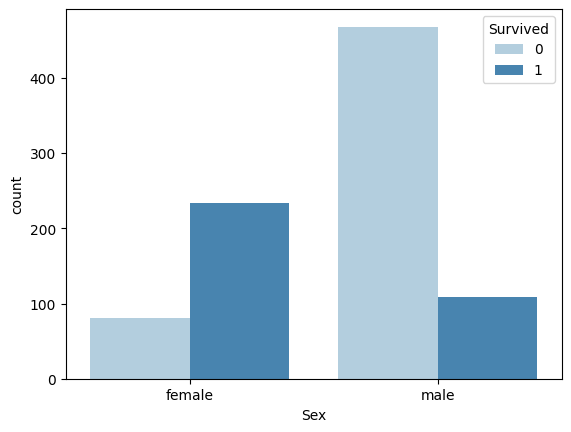

In [221]:
#Biểu đồ đếm số người sống và người chết ở 2 giới tính
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Blues');

= Remaining Categorical Feature Columns

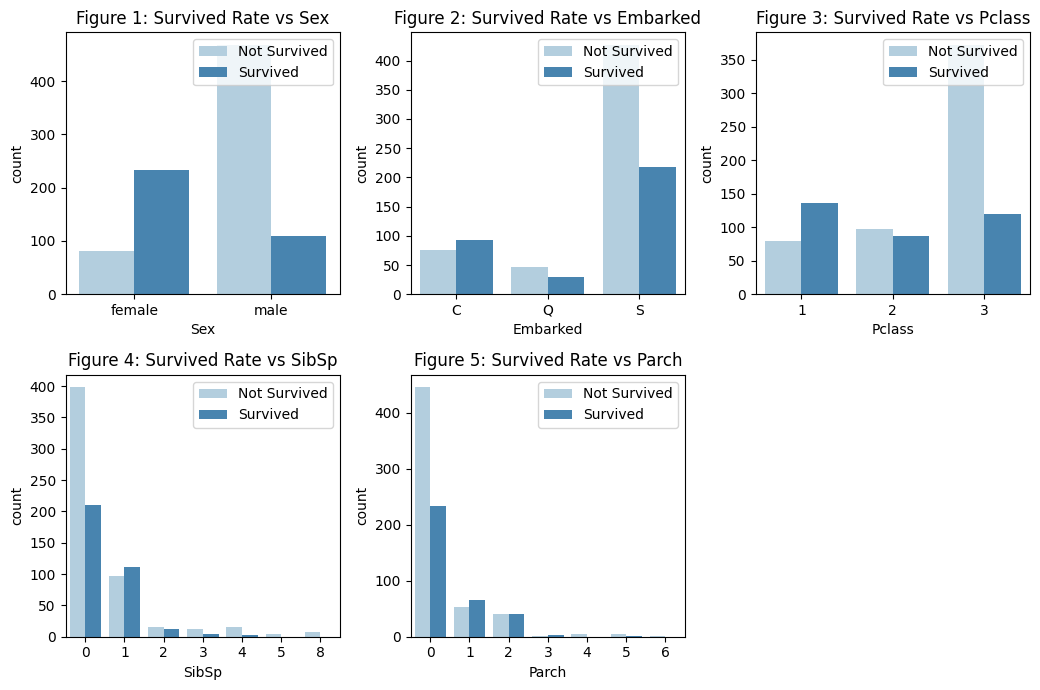

In [222]:
# importing library
import matplotlib.pyplot as plt



cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))
# function to add value labels

for r in range (0, n_rows):
    for c in range (0, n_cols):
        i=r*n_cols + c #index to loop through list "cols"
        if i < len (cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x = cols[i], hue='Survived', palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survived Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels = ['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) #Emove the last subplot
def add_label(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        # setting figure size by using figure() function 
    plt.figure(figsize = (10, 5))
     
    # making the bar chart on the data
    plt.bar(x, y)
     
    # calling the function to add value labels
    add_label(x, y)
     
    # giving title to the plot
    plt.title("College Admission")
     
    # giving X and Y labels
    plt.xlabel("Courses")
    plt.ylabel("Number of Admissions")
plt.tight_layout()

 # visualizing the plot
plt.show()


In [223]:
'''
# Kết luận

Fig 1: Tỷ lệ sống sót khi xét theo giới tính: phụ nữ có số lượng trên tàu ít hơn, nhưng lại có tỷ lệ sống sót cao hơn.
Fig 2: Tỷ lệ sống sót khi xét theo vị trí lên tàu (C = Cherbourg; Q = Queenstown; S = Southampton): Những hành khách lên từ cảng S = Southampton có tỷ lệ sống sót cao nhất. 
Và cảng S = Southampton cũng là nơi tỷ lệ khách lên tàu nhiều nhất
Fig 3: Tỷ lệ sống sót theo hạng ghế hành khách trên tàu: hạng ghế 1 có tỷ lệ sống sót cao nhât -> hạng 2 -> hạng 3
Fig 4: Tỷ lệ sống sót theo số lượng anh chị em ruột hoặc vợ/chồng của hành khách trên tàu (SibSp)
Fig 5: Tỷ lệ sống sót theo số lượng cha mẹ hoặc con cái của hành khách trên tàu (Parch)
'''


SyntaxError: invalid syntax (2819185973.py, line 3)


# Kết luận

    Fig 1: Tỷ lệ sống sót khi xét theo giới tính: phụ nữ có số lượng trên tàu ít hơn, nhưng lại có tỷ lệ sống sót cao hơn.
    Fig 2: Tỷ lệ sống sót khi xét theo vị trí lên tàu (C = Cherbourg; Q = Queenstown; S = Southampton): Những hành khách lên từ cảng S = Southampton có tỷ lệ sống sót cao nhất. 
            Và cảng S = Southampton cũng là nơi tỷ lệ khách lên tàu nhiều nhất.
    Fig 3: Tỷ lệ sống sót theo hạng ghế hành khách trên tàu: hạng ghế 1 có tỷ lệ sống sót cao nhât -> hạng 2 -> hạng 3
    Fig 4: Tỷ lệ sống sót theo số lượng anh chị em ruột hoặc vợ/chồng của hành khách trên tàu (SibSp)
    Fig 5: Tỷ lệ sống sót theo số lượng cha mẹ hoặc con cái của hành khách trên tàu (Parch)


2. LOADING THE DATA

In [ ]:
'''
Survival Rate:
- Fig 1: Female survival > male. Tỷ lệ sống sót ở nữ cao hơn ở nam
- Fig 2: Most People embarked on Southampton, and also had the hightest people not survived. 
Hầu hết mọi người lên ở cảng Southampton, và cũng có nhiều người không sống sót nhất.
- Fig 3: 1st class higher survival rate. Số lượng sống sót cao nhất là ở hạng thương gia, hàng 1.
- Fig 4: People going with 0 SibSp are mostly not survived. the num ber of passenger with 1 - 2 family members has a better chance of survival.
- Fig 5: People going with 0 Parch are mostly not survived.
'''

'\nSurvival Rate:\n- Fig 1: Female survival > male. Tỷ lệ sống sót ở nữ cao hơn ở nam\n- Fig 2: Most People embarked on Southampton, and also had the hightest people not survived. \nHầu hết mọi người lên ở cảng Southampton, và cũng có nhiều người không sống sót nhất.\n- Fig 3: 1st class higher survival rate. Số lượng sống sót cao nhất là ở hạng thương gia, hàng 1.\n- Fig 4: People going with 0 SibSp are mostly not survived. the num ber of passenger with 1 - 2 family members has a better chance of survival.\n- Fig 5: People going with 0 Parch are mostly not survived.\n'

3.2. EDA for Numberical Feature:

     Numberical Feature: (Coutinous) Age, Fare

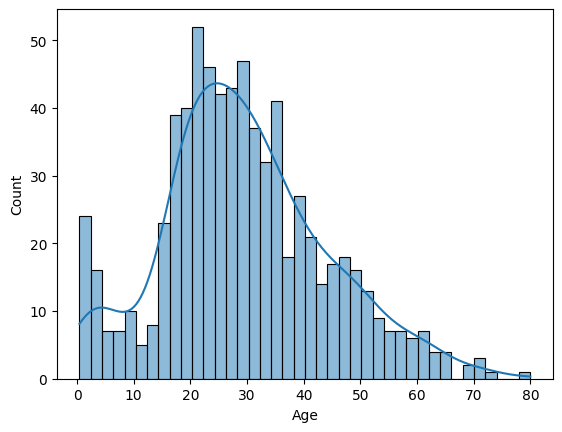

In [ ]:
#Tuổi của khách trên tàu giao động từ 0 đến 80 tuổi.
sns.histplot(data=train_df, x= 'Age', bins=40, kde=True);

Age

# Kết luận: 

        '''
    Hành khách đa số ở độ tuổi từ 18 - 40
    Trẻ em có nhiều cơ hội sống sót hơn các lứa tuổi khác.
        '''

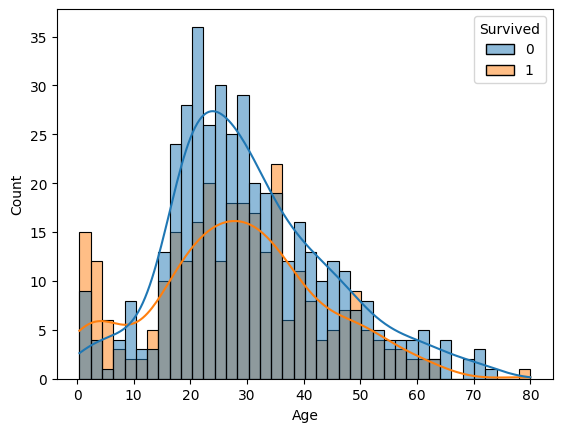

In [ ]:
#Tuổi của khách trên tàu giao động từ 0 đến 80 tuổi.
sns.histplot(data=train_df, x= 'Age', hue ='Survived', bins=40, kde=True);

FARE (GIA VE)

In [ ]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

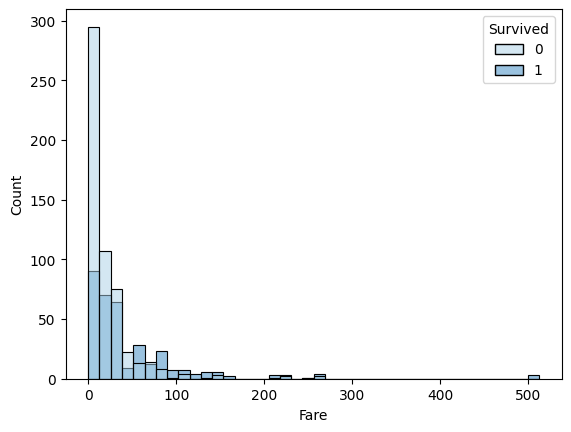

In [ ]:
sns.histplot(data=train_df, x='Fare', hue='Survived',  bins = 40, palette='Blues');

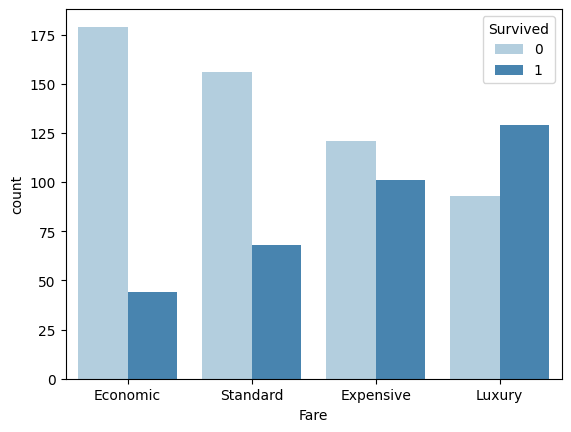

In [ ]:

fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut (train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df['Survived'], palette='Blues');

In [ ]:
train_df

,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_Cat
PassengerId,,,,,,,,,,,,,,
1,male,22.0,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small
2,female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small
3,female,26.0,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Solo
4,female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,53.1000,C123,S,Mrs,2,Small
5,male,35.0,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,NaN,S,Mr,1,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,male,27.0,"Montvila, Rev. Juozas",0,2,0,0,211536,13.0000,NaN,S,Others,1,Solo
888,female,19.0,"Graham, Miss. Margaret Edith",1,1,0,0,112053,30.0000,B42,S,Miss,1,Solo
889,female,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",0,3,1,2,W./C. 6607,23.4500,NaN,S,Miss,4,Small


In [ ]:
'''
- Distribution of Fare
    + Fare does not follow a normal distribution and has a huge spike at the price range (0-100$).
    + The distribution is skewed to the left with 75% of the fare paid under $31 and a max paid fare of $512.
- Quartile plot:
    + Passenger with Luxury & Expensive Fare will have more chance to survive
'''

'\n- Distribution of Fare\n    + Fare does not follow a normal distribution and has a huge spike at the price range (0-100$).\n    + The distribution is skewed to the left with 75% of the fare paid under $31 and a max paid fare of $512.\n- Quartile plot:\n    + Passenger with Luxury & Expensive Fare will have more chance to survive\n'

4. Feature Engiineering & Data Wrangling



Name

    - Regular Expression
  

In [ ]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [ ]:
import re #regular expression

def extract_title(name):
    p = re.compile(r", ([\w\s]+)\.")
  
    return p.search (name).groups(1)[0].strip()

train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name)) 

In [ ]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [ ]:
test_df['Title']= test_df['Name'].apply(lambda name: extract_title(name))

In [ ]:
test_df ['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [ ]:
def group_title (title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else: return "Others"

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [ ]:
train_df ['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64

In [ ]:
test_df ['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: count, dtype: int64

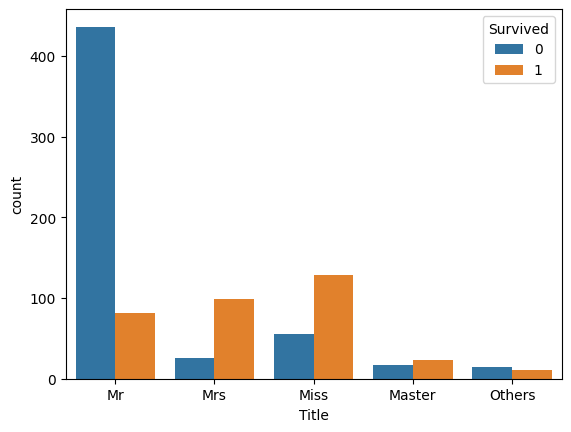

In [ ]:

sns.countplot(data = train_df, x='Title', hue='Survived'); 

# Kết luận: 
Danh xưng Miss có tỷ lệ sống cao nhất -> Cũng có thể kết luận phụ nữ có tỷ lệ sống sót cao hơn đàn ông.

Family

    'SibSp': số lượng mà anh chị em đi chung với nhau.
    'Parch': số lượng bố mẹ con cái đi chung với nhau.


In [ ]:
train_df ['Family_Size'] = train_df ['SibSp'].astype('int') + train_df ['Parch']. astype('int') +1

In [ ]:
test_df ['Family_Size'] = test_df ['SibSp'].astype('int') + test_df ['Parch']. astype('int') +1

In [ ]:
#cat: catagorical ['Solo', 'Small', 'Medium', 'Large']
# (0,1], (1,4], (4,6], (6,20])

train_df['Family_Cat']=pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])
train_df.head(10)

,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_Cat
PassengerId,,,,,,,,,,,,,,
1,male,22.0,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small
2,female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small
3,female,26.0,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Solo
4,female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,53.1000,C123,S,Mrs,2,Small
5,male,35.0,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,NaN,S,Mr,1,Solo
6,male,NaN,"Moran, Mr. James",0,3,0,0,330877,8.4583,NaN,Q,Mr,1,Solo
7,male,54.0,"McCarthy, Mr. Timothy J",0,1,0,0,17463,51.8625,E46,S,Mr,1,Solo
8,male,2.0,"Palsson, Master. Gosta Leonard",0,3,3,1,349909,21.0750,NaN,S,Master,5,Medium
9,female,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,347742,11.1333,NaN,S,Mrs,3,Small


In [ ]:
#cat: catagorical ['Solo', 'Small', 'Medium', 'Large']
# (0,1], (1,4], (4,6], (6,20])

train_df['Family_Cat']=pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])
test_df['Family_Cat']=pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])


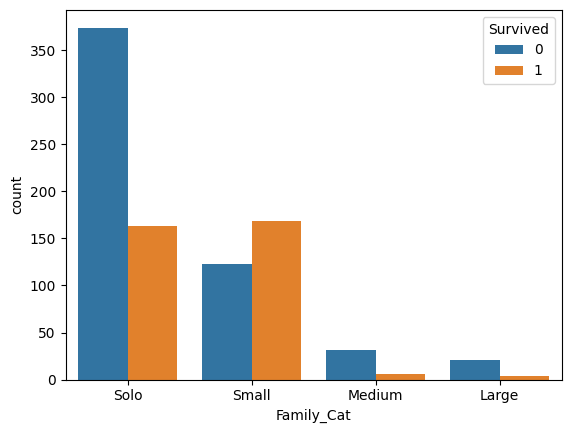

In [ ]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived');

# cat: catagorical
# Phân loại nhóm người đi với người thân, gia đình.
    Family_cat:
    - Solo: 0 - 1
    - Small: 1 - 4
    - Medium: 4 - 6
    - Large: 6 - 20

# Kết luận: 
    Những người đi một mình có tỷ lệ sống sót rất thấp: dưới 50%.
    Những người thuộc nhóm Small: có tỷ lệ sống sót cao nhất.
    Những người thuộc nhóm Medium và Large: có tỷ lệ sống sót thấp hơn nhiều so với tỷ lệ không sống sót


4.2 DATA WRANGLING

cat = catagorical

In [ ]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features    
print (feature_cols)    

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [ ]:
def display_missing (df, feature_cols):
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print (f"Col {col} has {missing_count} missing values.")

display_missing(train_df, feature_cols)

Col Age has 177 missing values.
Col Embarked has 2 missing values.


In [ ]:
def display_missing (df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print (f"{col} has {missing_count*100/n_rows:.2f}% missing values.")

#print ('Missing data of Train_df:')
display_missing(train_df, feature_cols)
#print ('Missing Data of Test_df:')
display_missing(test_df, feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.


Filling missing values

Age

    Filling missing values with 'median' of whole dataset

In [ ]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']


In [ ]:
age_by_sex_pclass=train_df[['Pclass', 'Sex','Age']].groupby(['Pclass','Sex']).median().reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_13504\711534154.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass=train_df[['Pclass', 'Sex','Age']].groupby(['Pclass','Sex']).median().reset_index()


In [ ]:
age_by_sex_pclass

,Pclass,Sex,Age
0,1,female,35.0
1,1,male,40.0
2,2,female,28.0
3,2,male,30.0
4,3,female,21.5
5,3,male,25.0


In [ ]:
# Filing the missing values in Age with the median of Sex and Pclass groups
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [ ]:

test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [ ]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.


In [ ]:
x = train_df [feature_cols]
y = train_df ['Survived']

In [ ]:
X_test= test_df[feature_cols]

In [ ]:
#preprocess pipeline
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline (steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline (steps=[
    ('imputer', SimpleImputer (strategy='most_frequent')),
    ('encoder', OneHotEncoder (handle_unknown='igmore'))
])

In [ ]:
preprocessor = ColumnTransformer (transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [ ]:
preprocessor.fit(X)

In [ ]:
X = preprocessor.transform(X)

# X -> X_train, X_val 

In [ ]:
X_test = preprocessor.transform(X_test)

5. MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2)

In [ ]:
X_train.shape, X_val.shape

((120, 4), (30, 4))

In [ ]:
X_test.shape

(38, 4)

In [ ]:
#binary classifcation
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import precision_score, recall_score

In [ ]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
log_reg.score(X_val, y_val)

0.9333333333333333

In [ ]:
y_pred = log_reg.predict(X_val)

In [ ]:
precision_score (y_val, y_pred)